In [8]:
import imageio
import glob
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image

images = []
image_paths = []

for im_path in glob.glob("./pngs/dataset/*.png"):
    image_paths.append(im_path)

for i in range(1,201,1):
    im = image.imread(image_paths[i])
    images.append(im)


images = np.array(images)


print(images.shape)

(200, 490, 490, 4)


In [136]:
image_paths

AttributeError: 'list' object has no attribute 'shape'

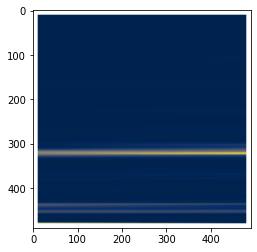

In [10]:
def display_image(data, index):
  image = data[index]
  # call method to show image here.
  plt.imshow(image)
  plt.show()

def onehotencode(y_train, y_test):
  from tensorflow.keras.utils import to_categorical
  y_train_categorical = to_categorical(y_train)
  y_test_categorical = to_categorical(y_test)
  return y_train_categorical, y_test_categorical

def reshape_data_cnn(x_train, x_test):

  height = x_train.shape[1]
  width = x_train.shape[2]
  channels = 3
  
  # reshape train and test data here.
  x_train_cnn = x_train.reshape(x_train.shape[0], height, width, channels)
  x_test_cnn = x_test.reshape(x_test.shape[0], height, width, channels)

  return x_train_cnn, x_test_cnn

def make_predictions(model, data, image):
  display_image(x_test, image[0])

  predictions = model.predict(data[image])
  return predictions[0]

# images[0]

display_image(images,0)

In [110]:
def build_fit_eval_model(x_train, x_test, y_train_categorical, y_test_categorical):
  import numpy as np
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense
  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.layers import Conv2D
  from tensorflow.keras.layers import MaxPooling2D
  from tensorflow. keras.layers import Flatten

  height = x_train.shape[1]
  width = x_train.shape[2]
  channels = 3
  num_classes = len(np.unique(y_train))


  # build model here.
  model = Sequential()

  model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(height, width, channels)))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  """
  one common approach is to add more filters as we add more layers.. the idea being that the early layers 'learn' 
  more specific features such as edges in an image while later layers learn more specific features.. 
  while early layers may learn to detect lines, later filters may learn to detect sleeves of a shirt, or heels of a shoe
  """
  model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(height, width, channels)))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  """
  once we finish convolutions, we need to squish or non 1D output into something a 
  fully connected neural network can process.
  you can think of the convolution layers as learning image features, while the fully connected
  layer below is performing classification using them.
  """
  model.add(Flatten())
  """
  now that we have squished, or flattened it, we can either just add one more layer that we want to be our 
  predicted class probablities, or we can add some more dense (for e.g.) layers first..
  the final dense layer will be our output layer, producing probablities that the image belongs to each class
  """
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))


  # compile model here
  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


  # fit/train model here
  history = model.fit(x_train_cnn, y_train_categorical, epochs=10)

  # evaluate model on test set here
  loss, accuracy = model.evaluate(x_test_cnn, y_test_categorical)

  return model

In [11]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np




x_train, x_test, y_test, y_train = fashion_mnist.load_data()

print(x_train.shape)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
num_classes = len(np.unique(y_train))
height = x_train.shape[1]
width = x_train.shape[2]
channels = 1
x_train_cnn = x_train.reshape(x_train.shape[0], height, width, channels)
x_test_cnn = x_test.reshape(x_test.shape[0], height, width, channels)

# CNN(x_train_cnn, y_train_categorical)



(60000, 28, 28)
